# Лабораторная работа №1
## Вариант №7

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv') 

In [70]:
print(df.info()) 
print(df.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB
None
              year   index price  lo

In [71]:
print(df.columns) 

Index(['stock index', 'country', 'year', 'index price', 'log_indexprice',
       'inflationrate', 'oil prices', 'exchange_rate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'manufacturingoutput',
       'tradebalance', 'USTreasury'],
      dtype='object')


In [72]:
print(df.iloc[0]) 
print(df['country']) 

stock index                              NASDAQ
country                United States of America
year                                     1980.0
index price                              168.61
log_indexprice                             2.23
inflationrate                              0.14
oil prices                                21.59
exchange_rate                               1.0
gdppercent                                 0.09
percapitaincome                         12575.0
unemploymentrate                           0.07
manufacturingoutput                         NaN
tradebalance                             -13.06
USTreasury                                 0.11
Name: 0, dtype: object
0      United States of America
1      United States of America
2      United States of America
3      United States of America
4      United States of America
                 ...           
364                       Spain
365                       Spain
366                       Spain
367              

In [73]:
grouped = df.groupby('country').agg({'index price': 'mean'})
print(grouped)

                           index price
country                               
China                      2329.655417
France                     3166.182683
Germany                    5030.647561
Hong Kong                 14790.129091
India                     14204.314516
Japan                     16142.580000
Spain                      7735.470294
United Kingdom             5323.457097
United States of America   2282.994878


In [74]:
sorted_df = df.sort_values(by='stock index', ascending=True) 
print(sorted_df)

    stock index country    year  index price  log_indexprice  inflationrate  \
307      CAC 40  France  2000.0      5926.42            3.77           0.02   
304      CAC 40  France  1997.0      2998.90            3.48           0.01   
303      CAC 40  France  1996.0      2315.70            3.36           0.02   
302      CAC 40  France  1995.0      1872.00            3.27           0.02   
301      CAC 40  France  1994.0      1881.20            3.27           0.02   
..          ...     ...     ...          ...             ...            ...   
228      SZCOMP   China  2003.0      1467.88            3.17           0.01   
227      SZCOMP   China  2002.0      1561.31            3.19          -0.01   
226      SZCOMP   China  2001.0      1940.96            3.29           0.01   
235      SZCOMP   China  2010.0      2795.88            3.45           0.03   
244      SZCOMP   China  2019.0      2928.94            3.47           0.03   

     oil prices  exchange_rate  gdppercent  percapi

In [75]:
df_dropped = df.drop(columns=['USTreasury'])  
df_dropped = df_dropped.drop(index=[0, 1]) 

In [76]:
df['real_index_price'] = df['index price'] / (1 + df['inflationrate'])

In [77]:
df_cleaned = df.dropna()  

In [78]:
df_filled = df.fillna(value=0)  

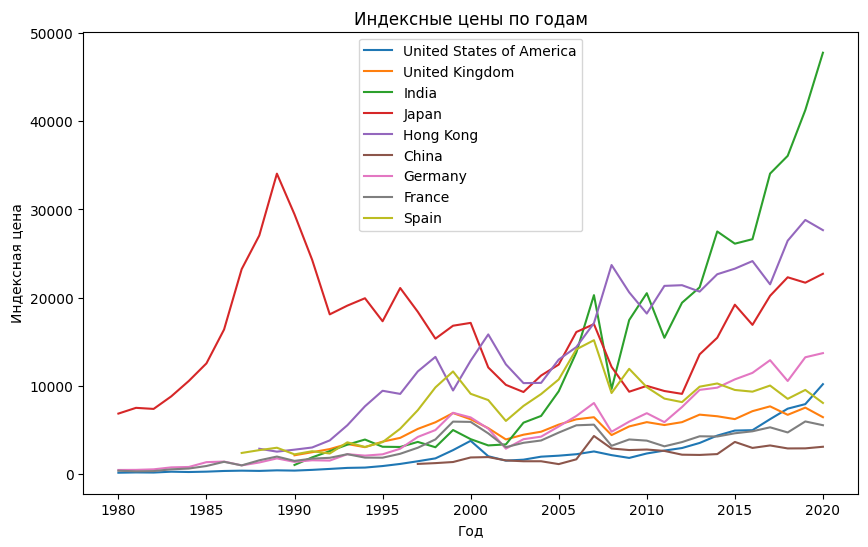

In [79]:
plt.figure(figsize=(10,6))
for country in df['country'].unique():
    plt.plot(df[df['country'] == country]['year'], df[df['country'] == country]['index price'], label=country)
plt.title('Индексные цены по годам')
plt.xlabel('Год')
plt.ylabel('Индексная цена')
plt.legend()
plt.show()

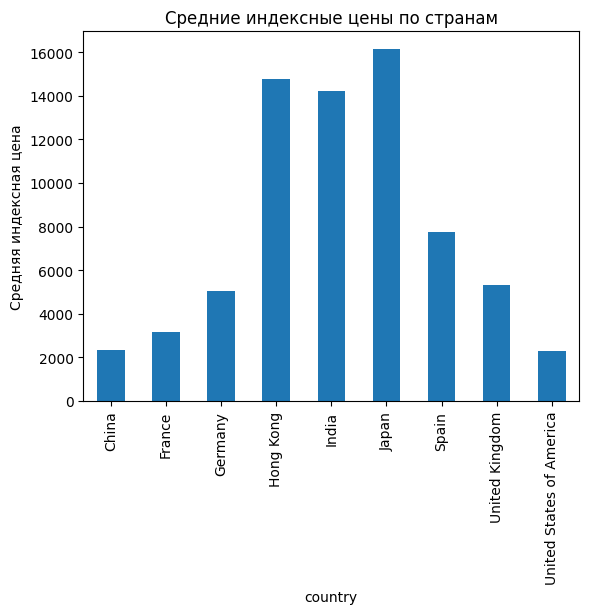

In [80]:
df.groupby('country')['index price'].mean().plot(kind='bar')
plt.title('Средние индексные цены по странам')
plt.ylabel('Средняя индексная цена')
plt.show()

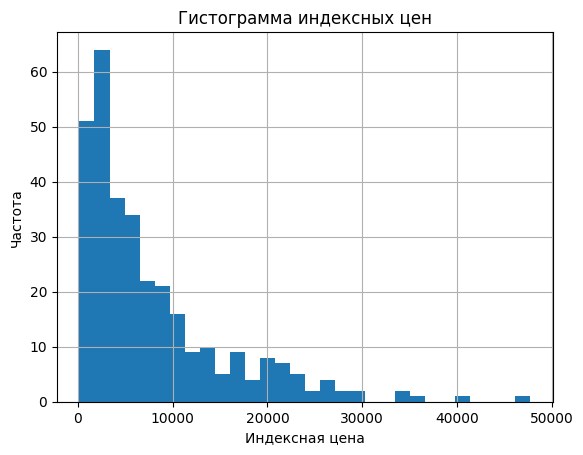

In [81]:
df['index price'].hist(bins=30)
plt.title('Гистограмма индексных цен')
plt.xlabel('Индексная цена')
plt.ylabel('Частота')
plt.show()

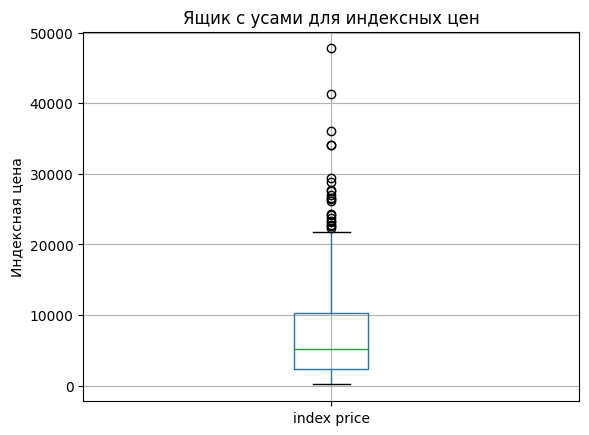

In [82]:
df.boxplot(column='index price')
plt.title('Ящик с усами для индексных цен')
plt.ylabel('Индексная цена')
plt.show()

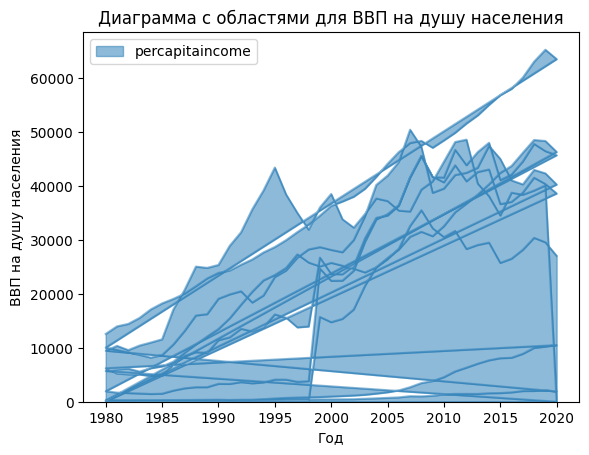

In [83]:
df.plot.area(x='year', y='percapitaincome', alpha=0.5)
plt.title('Диаграмма с областями для ВВП на душу населения')
plt.xlabel('Год')
plt.ylabel('ВВП на душу населения')
plt.show()

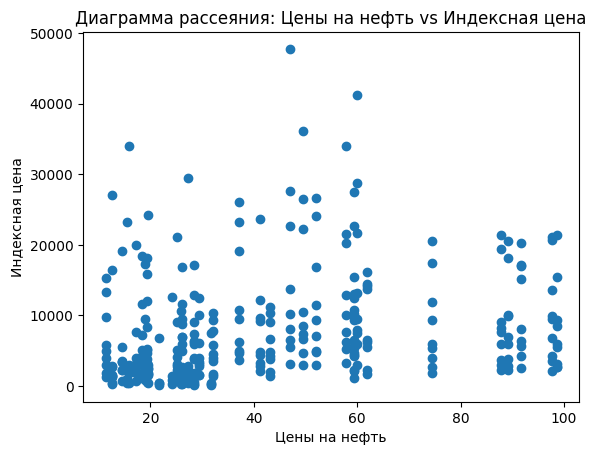

In [84]:
plt.scatter(df['oil prices'], df['index price'])
plt.title('Диаграмма рассеяния: Цены на нефть vs Индексная цена')
plt.xlabel('Цены на нефть')
plt.ylabel('Индексная цена')
plt.show()

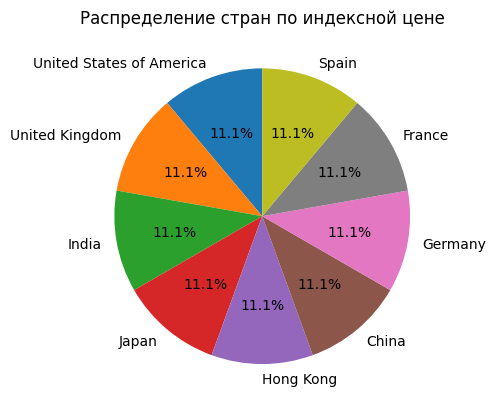

In [85]:
df['country'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Распределение стран по индексной цене')
plt.ylabel('')
plt.show()